In [189]:
# import pandas
import pandas as pd

In [190]:
# for visualize
import seaborn as sns

In [191]:
#read the data
df = pd.read_csv('/Users/liu/Desktop/MBAN6110/sales_data.csv')

In [192]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [193]:
#get a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Explain: From the outcome we can find that for Product there are 103 missing data, for Region there are 104 missing data,for Price there are 945 missing data, for Unit Sold there are 104 missing data.

In [194]:
# get a descride of the DataFrame
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [195]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df.info()
#Change the datatype of Sale Date from object to datetime(Will be used in doing the graph of the monthly and quarterly sales trends)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [196]:
#drop duplicates
df.drop_duplicates()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [197]:
df.info()
# info again we can find there is no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     947 non-null    object        
 1   Region      946 non-null    object        
 2   Price       945 non-null    float64       
 3   Units Sold  946 non-null    float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


In [198]:
#Replace Missing Values
df['Product'] = df['Product'].fillna('Other')

In [199]:
df['Region'] = df['Region'].fillna("Other")

In [200]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [201]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     1050 non-null   object        
 1   Region      1050 non-null   object        
 2   Price       1050 non-null   float64       
 3   Units Sold  1050 non-null   float64       
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.1+ KB


Explain: Check again, all non-null are 1050, there is no missing data now

<Axes: xlabel='Units Sold', ylabel='Count'>

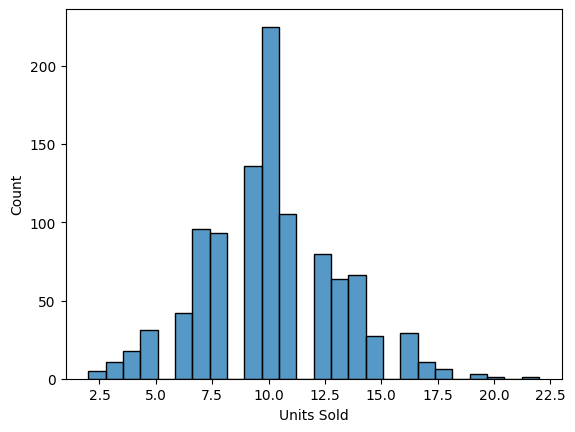

In [203]:
sns.histplot(df['Units Sold'])
# from the histogram there is no disdinct outlier

<Axes: >

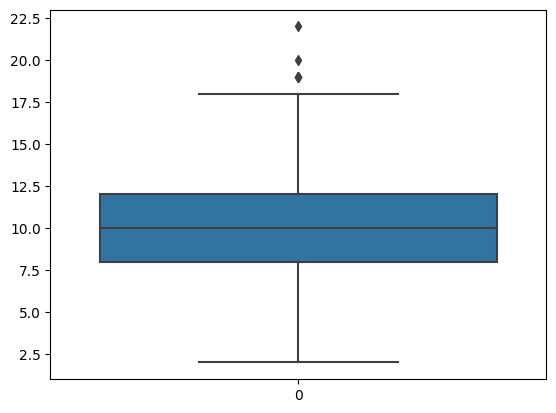

In [204]:
#Find the outliner
sns.boxplot(df['Units Sold'])
#from the box the outlier of Units Sold aren't disdinct,so don't drop 

<Axes: xlabel='Region', ylabel='Units Sold'>

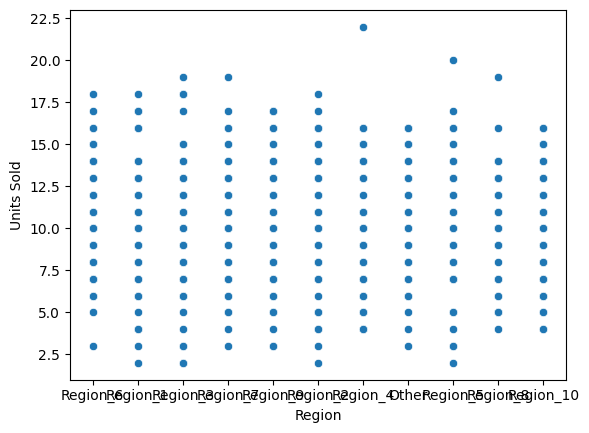

In [205]:
# Sales performance in different regions
sns.scatterplot(x="Region", y="Units Sold", data = df)


Explain: Scatter Plot show the Units Sold and Region are Null Correlation.Which means we can't do linear regression to see the relationship

<Axes: xlabel='Region', ylabel='Units Sold'>

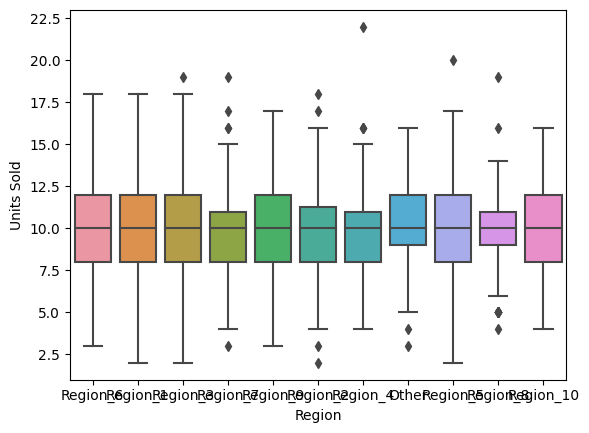

In [206]:
#boxplot of all products's units sold in different regions
sns.boxplot(x="Region", y="Units Sold", data = df)

The X axis are: Region_1,Region_2, Region_3, Region_4, Region_5,Region_6,Region_7,Region_8,Region_9,Region_10

In [207]:
# Show the mean min max median and the sum(total) of Units Sold in different Regions
df.groupby('Region')['Units Sold'].aggregate(['mean','min','max','median',"sum"]).sort_values('sum',ascending =False)


,mean,min,max,median,sum
Region,,,,,
Region_9,10.179665,3.0,17.0,10.048626,1109.583510
Region_10,10.152651,4.0,16.0,10.000000,1096.486258
Other,10.083469,3.0,16.0,10.048626,1048.680761
Region_4,9.893978,4.0,22.0,10.000000,999.291755
Region_3,10.212385,2.0,19.0,10.048626,980.389006
Region_8,9.852379,4.0,19.0,10.048626,955.680761
Region_5,10.090279,2.0,20.0,10.000000,948.486258
Region_6,10.111710,3.0,18.0,10.000000,940.389006
Region_1,10.142927,2.0,18.0,10.000000,872.291755


<Axes: xlabel='Product', ylabel='Units Sold'>

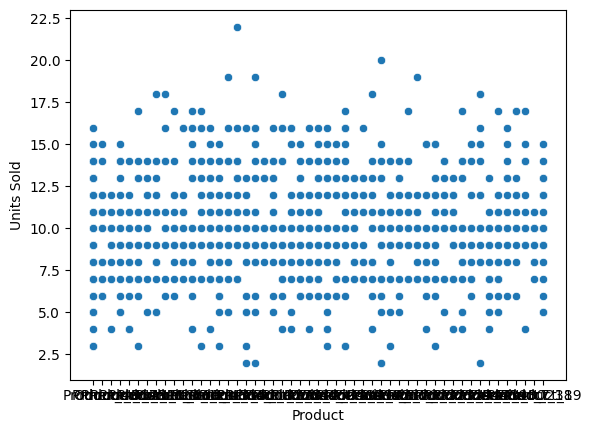

In [208]:
# Sales performance in different products
sns.scatterplot(x="Product", y="Units Sold", data = df)

Explain: Scatter Plot show the Units Sold and Products are Null Correlation.Which means we can't do linear regression to see the relationship

<Axes: xlabel='Product', ylabel='Units Sold'>

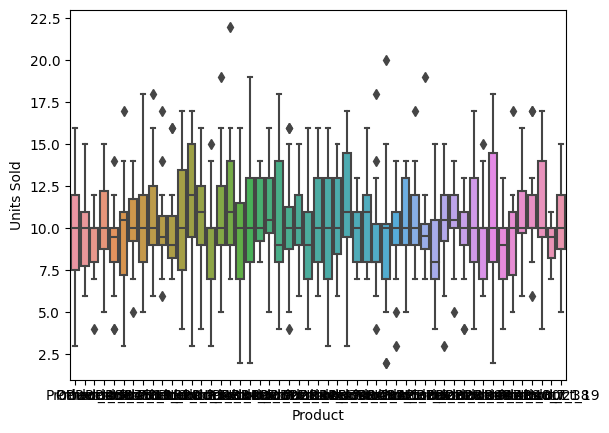

In [209]:
sns.boxplot(x="Product", y="Units Sold", data = df)

In [210]:
#Add Total Sales column
#Total Sales is the total sales income of the products.
df['Total Sales'] = df['Price'] * df['Units Sold']

In [211]:
# show the mean min max median and sum(total) of Total Sales for  different region
df.groupby('Region')['Total Sales'].aggregate(['mean','min','max','median',"sum"]).sort_values('sum',ascending= False)

,mean,min,max,median,sum
Region,,,,,
Region_8,1443.749331,6.100000,10716.50,931.507611,140043.685111
Region_9,1062.402065,0.990000,4745.30,900.990000,115801.825100
Other,1054.960928,18.480000,6420.96,712.425000,109715.936551
Region_10,1015.545543,55.066469,4234.32,869.770000,109678.918697
Region_4,1045.543487,2.200000,5631.21,890.260000,105599.892231
Region_2,1214.343233,4.640000,7483.20,881.994207,102004.831584
Region_5,1079.220846,2.790000,4878.10,871.754751,101446.759547
Region_3,939.102759,11.610000,5985.00,762.840000,90153.864868
Region_1,1014.879973,10.560000,7132.90,647.895000,87279.677671


In [212]:
# show the mean min max median and sum(total) of Total Sales of different products
df.groupby('Product')['Total Sales'].aggregate(['mean','min','max','median',"sum"]).sort_values('sum',ascending= False)

,mean,min,max,median,sum
Product,,,,,
Other,990.300492,4.640000,4878.100000,766.200000,102000.950643
Product_31,1437.105909,68.770000,5985.000000,976.805000,31616.330000
Product_26,2419.504779,2.800000,7607.210000,811.250000,31453.562127
Product_29,1344.397460,14.940000,3221.400000,913.721543,30921.141571
Product_30,1283.163132,31.070000,4631.520000,1451.844641,30795.915159
Product_15,1461.380081,36.000000,10716.500000,712.666586,29227.601625
Product_14,1436.479796,61.560000,5172.900000,1153.550000,28729.595924
Product_7,1544.448575,88.200000,6088.160909,953.364434,27800.074348
Product_40,1259.825945,24.360000,4280.915560,931.507611,27716.170782


<Axes: xlabel='Total Sales', ylabel='Count'>

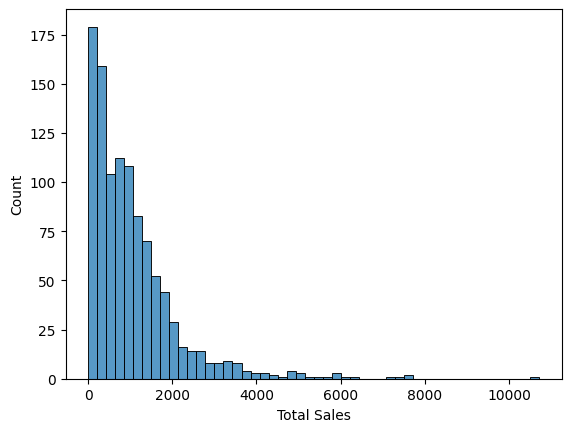

In [213]:
# find outlier of Total Sales
sns.histplot(df['Total Sales'])

<Axes: >

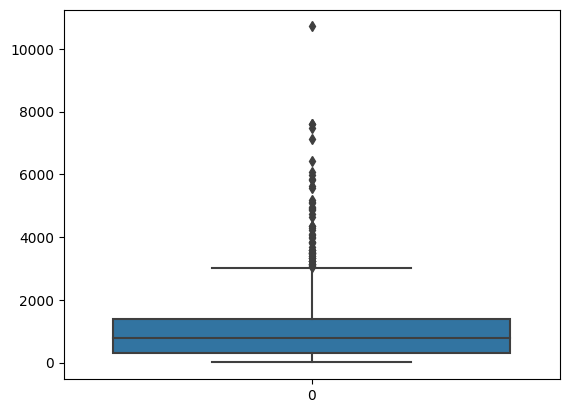

In [214]:
# find detailed outlier of Total Sales
sns.boxplot(df['Total Sales'])

In [215]:
df[df['Total Sales'] > 10000] 

,Product,Region,Price,Units Sold,Sale Date,Total Sales
969,Product_15,Region_8,2143.3,5.0,2024-08-27,10716.5


In [216]:
#drop the outlier
drop_index = [969]
df.drop(drop_index, axis =0, inplace = True)

<Axes: xlabel='Total Sales', ylabel='Count'>

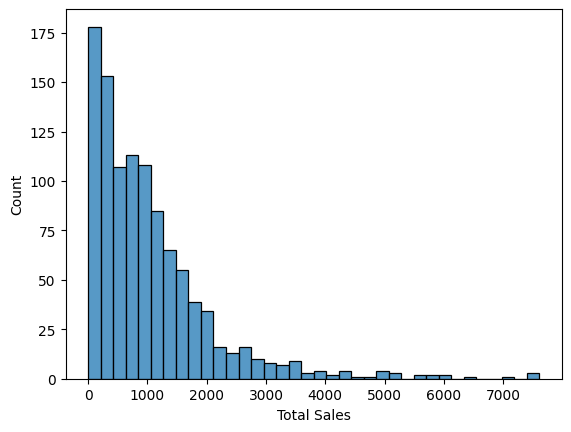

In [217]:
#Check
sns.histplot(df['Total Sales'])

<Axes: >

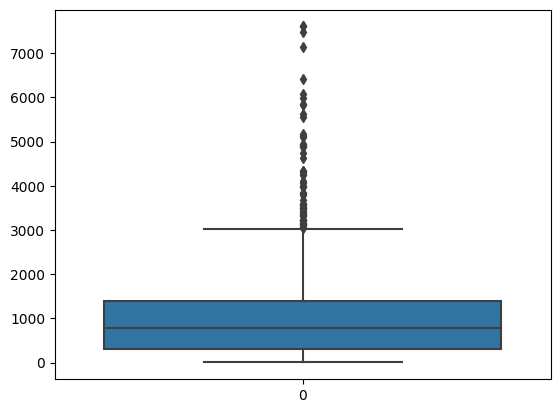

In [218]:
#check
sns.boxplot(df['Total Sales'])

In [219]:
df[df['Total Sales'] > 3000] 

,Product,Region,Price,Units Sold,Sale Date,Total Sales
23,Product_50,Region_2,249.30,16.000000,2022-01-24,3988.800000
36,Product_2,Region_9,296.03,13.000000,2022-02-06,3848.390000
117,Product_3,Other,201.54,16.000000,2022-04-28,3224.640000
119,Product_35,Other,401.31,16.000000,2022-04-30,6420.960000
178,Product_23,Region_2,300.82,10.000000,2022-06-28,3008.200000
189,Product_35,Region_1,511.74,10.000000,2022-07-09,5117.400000
220,Product_10,Region_5,291.53,12.000000,2022-08-09,3498.360000
234,Product_34,Region_9,496.61,8.000000,2022-08-23,3972.880000
264,Product_14,Region_7,517.29,10.000000,2022-09-22,5172.900000
275,Product_16,Region_4,433.17,13.000000,2022-10-03,5631.210000


Explain: As there are many variables which seems not to drop them is a better choice, so don't drop

<Axes: xlabel='Region', ylabel='Total Sales'>

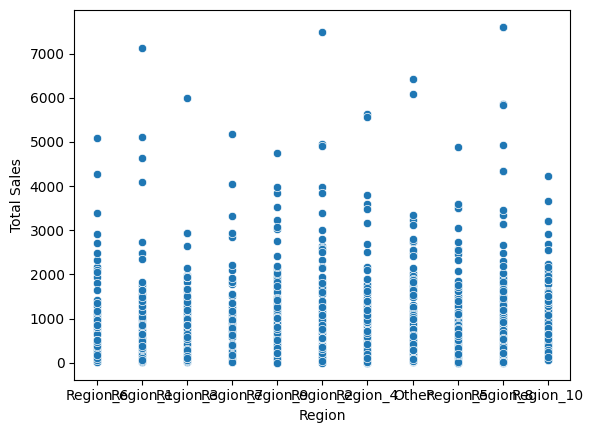

In [220]:
# Sales performance in different regions
sns.scatterplot(x="Region", y="Total Sales", data = df)

<Axes: xlabel='Region', ylabel='Total Sales'>

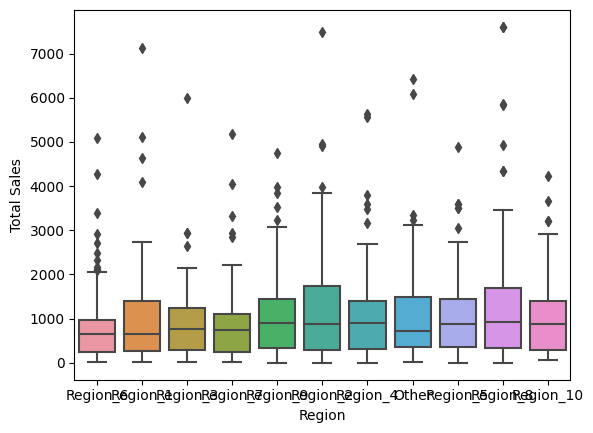

In [221]:
sns.boxplot(x="Region", y="Total Sales", data = df)

As from the above we run product for units sold there are to many products its hard to decride do we choose the Region as the X-axis to do the anaylze.

In [222]:
#As Sale Date is object change it to date
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df = df.set_index('Sale Date')
#add monthly and quarterly sales columns
df_monthly_sales= df['Total Sales'].resample('M').sum()
df_quarterly_sales = df['Total Sales'].resample('Q').sum()

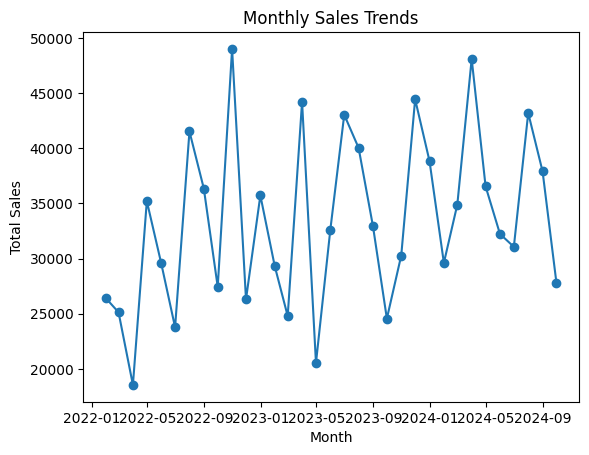

In [223]:
#show the trend of monthly sales of the total products
plt.plot(df_monthly_sales, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()


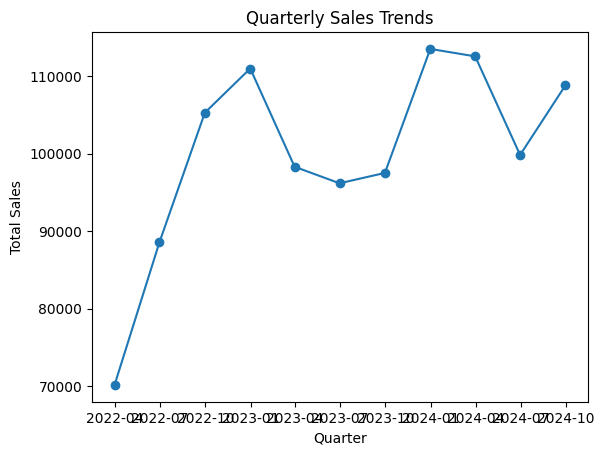

In [224]:
#show the trend of quarterly sales of the total products
plt.plot(df_quarterly_sales, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales Trends')
plt.show()

In [235]:
#Group data of the same Region together
#See in different region which product sold the more units
#Than see in different region which product got more income(total sales)
df_grouped=df.groupby('Region')
df_grouped.get_group('Region_1').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-07-23,Product_42,Region_1,9.720000,18.0,174.960000
2024-03-06,Product_7,Region_1,107.598688,17.0,1829.177693
2022-06-12,Product_2,Region_1,102.290000,17.0,1738.930000
2024-07-11,Product_20,Region_1,241.390000,17.0,4103.630000
2022-10-23,Product_13,Region_1,17.000000,16.0,272.000000
...,...,...,...,...,...
2022-11-29,Product_21,Region_1,52.590000,4.0,210.360000
2022-01-31,Product_45,Region_1,106.770000,4.0,427.080000
2022-09-26,Product_39,Region_1,78.130000,4.0,312.520000


In [225]:
df_grouped.get_group('Region_1').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-05-03,Product_41,Region_1,713.29,10.0,7132.90
2022-07-09,Product_35,Region_1,511.74,10.0,5117.40
2024-01-14,Product_30,Region_1,385.96,12.0,4631.52
2024-07-11,Product_20,Region_1,241.39,17.0,4103.63
2024-04-20,Product_50,Region_1,303.70,9.0,2733.30
...,...,...,...,...,...
2022-06-06,Product_13,Region_1,3.76,14.0,52.64
2023-01-13,Other,Region_1,4.96,10.0,49.60
2022-06-29,Product_46,Region_1,5.81,8.0,46.48


In [236]:
df_grouped.get_group('Region_2').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-03-07,Product_16,Region_2,272.83,18.0,4910.94
2022-01-15,Product_3,Region_2,13.77,17.0,234.09
2024-01-17,Product_13,Region_2,7.23,16.0,115.68
2022-01-24,Product_50,Region_2,249.30,16.0,3988.80
2022-02-17,Product_10,Region_2,58.50,16.0,936.00
...,...,...,...,...,...
2022-01-25,Product_6,Region_2,60.41,5.0,302.05
2023-02-11,Product_29,Region_2,87.89,4.0,351.56
2023-02-11,Product_29,Region_2,87.89,4.0,351.56


In [226]:
df_grouped.get_group('Region_2').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-03-25,Product_26,Region_2,623.60,12.000000,7483.200000
2022-10-21,Product_22,Region_2,493.20,10.048626,4955.982241
2024-03-07,Product_16,Region_2,272.83,18.000000,4910.940000
2022-01-24,Product_50,Region_2,249.30,16.000000,3988.800000
2023-12-20,Product_27,Region_2,273.87,14.000000,3834.180000
...,...,...,...,...,...
2022-04-15,Product_24,Region_2,4.22,15.000000,63.300000
2022-10-01,Product_43,Region_2,2.41,15.000000,36.150000
2024-07-12,Product_36,Region_2,4.87,7.000000,34.090000


In [237]:
df_grouped.get_group('Region_3').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2022-08-21,Product_14,Region_3,104.270000,19.0,1981.130000
2023-01-26,Product_41,Region_3,107.598688,18.0,1936.776381
2023-11-10,Product_9,Region_3,107.598688,18.0,1936.776381
2023-01-26,Product_41,Region_3,107.598688,18.0,1936.776381
2023-08-23,Product_10,Region_3,107.598688,17.0,1829.177693
...,...,...,...,...,...
2022-12-16,Product_2,Region_3,99.020000,4.0,396.080000
2023-12-08,Other,Region_3,255.400000,3.0,766.200000
2023-03-24,Product_3,Region_3,15.050000,3.0,45.150000


In [227]:
df_grouped.get_group('Region_3').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-12-30,Product_31,Region_3,665.00,9.000000,5985.000000
2024-06-07,Product_48,Region_3,294.21,10.000000,2942.100000
2024-06-07,Product_48,Region_3,294.21,10.000000,2942.100000
2022-04-13,Product_47,Region_3,221.01,12.000000,2652.120000
2023-12-13,Product_1,Region_3,268.73,8.000000,2149.840000
...,...,...,...,...,...
2023-01-08,Product_34,Region_3,9.21,10.048626,92.547844
2022-02-25,Product_31,Region_3,5.29,13.000000,68.770000
2023-05-01,Product_23,Region_3,7.08,9.000000,63.720000


In [238]:
df_grouped.get_group('Region_4').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-12-21,Product_50,Region_4,86.73,22.0,1908.06
2024-01-25,Product_10,Region_4,6.35,16.0,101.60
2024-01-25,Product_10,Region_4,6.35,16.0,101.60
2023-06-12,Product_30,Region_4,100.80,16.0,1612.80
2022-10-22,Product_10,Region_4,72.41,15.0,1086.15
...,...,...,...,...,...
2022-06-27,Product_36,Region_4,43.74,4.0,174.96
2023-03-21,Product_35,Region_4,121.33,4.0,485.32
2024-05-06,Product_43,Region_4,6.07,4.0,24.28


In [228]:
df_grouped.get_group('Region_4').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2022-10-03,Product_16,Region_4,433.17,13.000000,5631.210000
2023-06-11,Product_31,Region_4,505.01,11.000000,5555.110000
2024-08-04,Product_31,Region_4,345.20,11.000000,3797.200000
2022-10-16,Product_5,Region_4,239.58,15.000000,3593.700000
2023-05-04,Product_2,Region_4,347.20,10.048626,3488.882875
...,...,...,...,...,...
2023-09-07,Product_17,Region_4,5.76,5.000000,28.800000
2024-05-06,Product_43,Region_4,6.07,4.000000,24.280000
2023-03-08,Product_34,Region_4,1.39,9.000000,12.510000


In [239]:
df_grouped.get_group('Region_5').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2022-08-10,Product_5,Region_5,50.360000,20.0,1007.200000
2024-06-28,Product_21,Region_5,46.990000,17.0,798.830000
2024-06-02,Product_27,Region_5,107.598688,16.0,1721.579005
2024-05-04,Product_9,Region_5,55.170000,16.0,882.720000
2023-02-12,Product_1,Region_5,78.940000,16.0,1263.040000
...,...,...,...,...,...
2023-11-13,Product_40,Region_5,287.200000,5.0,1436.000000
2024-04-16,Product_24,Region_5,287.650000,4.0,1150.600000
2022-05-05,Product_37,Region_5,100.650000,3.0,301.950000


In [229]:
df_grouped.get_group('Region_5').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-11-28,Other,Region_5,487.81,10.000000,4878.100000
2023-06-26,Product_6,Region_5,299.38,12.000000,3592.560000
2023-06-26,Product_6,Region_5,299.38,12.000000,3592.560000
2022-08-09,Product_10,Region_5,291.53,12.000000,3498.360000
2022-08-09,Product_10,Region_5,291.53,12.000000,3498.360000
...,...,...,...,...,...
2022-05-27,Product_16,Region_5,5.51,8.000000,44.080000
2023-08-21,Product_33,Region_5,2.22,8.000000,17.760000
2022-05-11,Product_50,Region_5,1.36,10.048626,13.666131


In [240]:
df_grouped.get_group('Region_6').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2022-06-17,Product_28,Region_6,107.598688,18.0,1936.776381
2024-03-16,Product_8,Region_6,97.300000,17.0,1654.100000
2022-07-11,Product_41,Region_6,133.130000,16.0,2130.080000
2024-05-17,Product_43,Region_6,50.880000,16.0,814.080000
2023-10-22,Product_41,Region_6,31.130000,15.0,466.950000
...,...,...,...,...,...
2022-12-02,Product_5,Region_6,11.640000,6.0,69.840000
2024-01-18,Product_7,Region_6,106.900000,6.0,641.400000
2024-03-09,Product_26,Region_6,107.598688,6.0,645.592127


In [230]:
df_grouped.get_group('Region_6').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-04-14,Product_15,Region_6,510.06,10.000000,5100.600000
2023-05-16,Product_40,Region_6,426.02,10.048626,4280.915560
2023-03-18,Product_28,Region_6,242.26,14.000000,3391.640000
2022-02-22,Product_49,Region_6,292.09,10.000000,2920.900000
2023-07-10,Product_39,Region_6,269.55,10.048626,2708.607082
...,...,...,...,...,...
2023-08-16,Product_6,Region_6,6.74,10.000000,67.400000
2022-05-07,Product_39,Region_6,7.51,7.000000,52.570000
2023-02-14,Other,Region_6,4.65,9.000000,41.850000


In [241]:
df_grouped.get_group('Region_7').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-08-20,Product_13,Region_7,0.610000,19.0,11.590000
2023-01-06,Product_44,Region_7,107.598688,17.0,1829.177693
2022-12-09,Product_24,Region_7,177.750000,16.0,2844.000000
2024-03-27,Other,Region_7,207.360000,16.0,3317.760000
2023-10-15,Product_19,Region_7,59.370000,15.0,890.550000
...,...,...,...,...,...
2023-07-05,Product_5,Region_7,3.560000,6.0,21.360000
2024-09-12,Product_40,Region_7,144.370000,5.0,721.850000
2022-04-08,Product_44,Region_7,251.530000,5.0,1257.650000


In [231]:
df_grouped.get_group('Region_7').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2022-09-22,Product_14,Region_7,517.29,10.0,5172.90
2024-09-24,Other,Region_7,311.80,13.0,4053.40
2024-03-27,Other,Region_7,207.36,16.0,3317.76
2024-07-05,Product_16,Region_7,244.05,12.0,2928.60
2022-12-09,Product_24,Region_7,177.75,16.0,2844.00
...,...,...,...,...,...
2023-03-11,Product_43,Region_7,7.34,7.0,51.38
2023-07-24,Product_48,Region_7,7.13,7.0,49.91
2023-07-05,Product_5,Region_7,3.56,6.0,21.36


In [242]:
df_grouped.get_group('Region_8').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-07-01,Product_22,Region_8,107.598688,19.0,2044.375069
2023-07-20,Product_25,Region_8,208.940000,16.0,3343.040000
2023-07-07,Product_15,Region_8,94.300000,14.0,1320.200000
2023-06-25,Product_33,Region_8,107.598688,14.0,1506.381630
2022-10-04,Product_48,Region_8,418.240000,14.0,5855.360000
...,...,...,...,...,...
2023-12-27,Other,Region_8,107.598688,5.0,537.993439
2023-07-02,Product_16,Region_8,45.610000,5.0,228.050000
2024-05-20,Product_37,Region_8,61.630000,5.0,308.150000


In [232]:
df_grouped.get_group('Region_8').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-03-14,Product_26,Region_8,585.17,13.000000,7607.210000
2023-03-14,Product_26,Region_8,585.17,13.000000,7607.210000
2022-10-04,Product_48,Region_8,418.24,14.000000,5855.360000
2023-11-16,Product_45,Region_8,580.60,10.048626,5834.232135
2023-07-06,Product_50,Region_8,447.75,11.000000,4925.250000
...,...,...,...,...,...
2022-06-09,Product_4,Region_8,2.52,9.000000,22.680000
2023-05-09,Product_32,Region_8,2.16,7.000000,15.120000
2024-05-15,Product_29,Region_8,1.66,9.000000,14.940000


In [243]:
df_grouped.get_group('Region_9').sort_values('Units Sold',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2024-08-08,Product_40,Region_9,86.33,17.0,1467.61
2024-09-20,Product_7,Region_9,128.51,17.0,2184.67
2024-09-01,Product_31,Region_9,29.92,17.0,508.64
2024-08-13,Product_6,Region_9,14.36,16.0,229.76
2023-12-12,Product_4,Region_9,92.40,16.0,1478.40
...,...,...,...,...,...
2022-08-17,Other,Region_9,27.07,5.0,135.35
2022-11-13,Product_18,Region_9,63.53,5.0,317.65
2023-03-03,Product_25,Region_9,205.03,4.0,820.12


In [233]:
df_grouped.get_group('Region_9').sort_values('Total Sales',ascending= False)

,Product,Region,Price,Units Sold,Total Sales
Sale Date,,,,,
2023-07-01,Product_14,Region_9,338.95,14.0,4745.30
2022-08-23,Product_34,Region_9,496.61,8.0,3972.88
2022-02-06,Product_2,Region_9,296.03,13.0,3848.39
2022-12-15,Product_40,Region_9,321.66,11.0,3538.26
2023-06-21,Product_12,Region_9,249.05,13.0,3237.65
...,...,...,...,...,...
2023-09-18,Product_29,Region_9,3.46,11.0,38.06
2022-07-02,Product_40,Region_9,3.48,7.0,24.36
2024-01-30,Product_9,Region_9,2.49,9.0,22.41


#Question 1


#Question 2


#Question 3